# Decision Tree on CTG dataset

# Author- Rohan Kulkarni

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('E:/Imarticus/7.DECISION TREE/CTG.csv')

In [3]:
df

,LB,AC,FM,NSP
0,120,0.000,0.000,2
1,132,0.006,0.000,1
2,133,0.003,0.000,1
3,134,0.003,0.000,1
4,132,0.007,0.000,1
...,...,...,...,...
2121,140,0.000,0.000,2
2122,140,0.001,0.000,2
2123,140,0.001,0.000,2
2124,140,0.001,0.000,2


In [4]:
df.isnull().sum()

LB     0
AC     0
FM     0
NSP    0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train,df_test= train_test_split(df,test_size=.2,random_state=100)

In [7]:
df_train_x=df_train.iloc[:,0:-1]
df_train_y=df_train.iloc[:,-1]

df_test_x=df_test.iloc[:,0:-1]
df_test_y=df_test.iloc[:,-1]




In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt=DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=4)

In [10]:
dt.fit(df_train_x,df_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [11]:
pred_dt=dt.predict(df_test_x)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
confusion_matrix(pred_dt,df_test_y)

array([[184,   0,   1],
       [ 66,  41,   3],
       [ 83,  13,  35]], dtype=int64)

In [14]:
accuracy_score(df_test_y,pred_dt)

0.6103286384976526

In [15]:
dt.feature_importances_

array([0.47422507, 0.42874974, 0.09702519])

In [16]:
feature_imp=pd.DataFrame({'importance':dt.feature_importances_,'columns':df_train_x.columns})
feature_imp.sort_values('importance',ascending=False)

,importance,columns
0,0.474225,LB
1,0.428750,AC
2,0.097025,FM


In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [18]:
!pip install pydotplus
!pip install pydot
from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image
from six import StringIO





In [19]:

ctg_train_x_names = df_train_x.columns

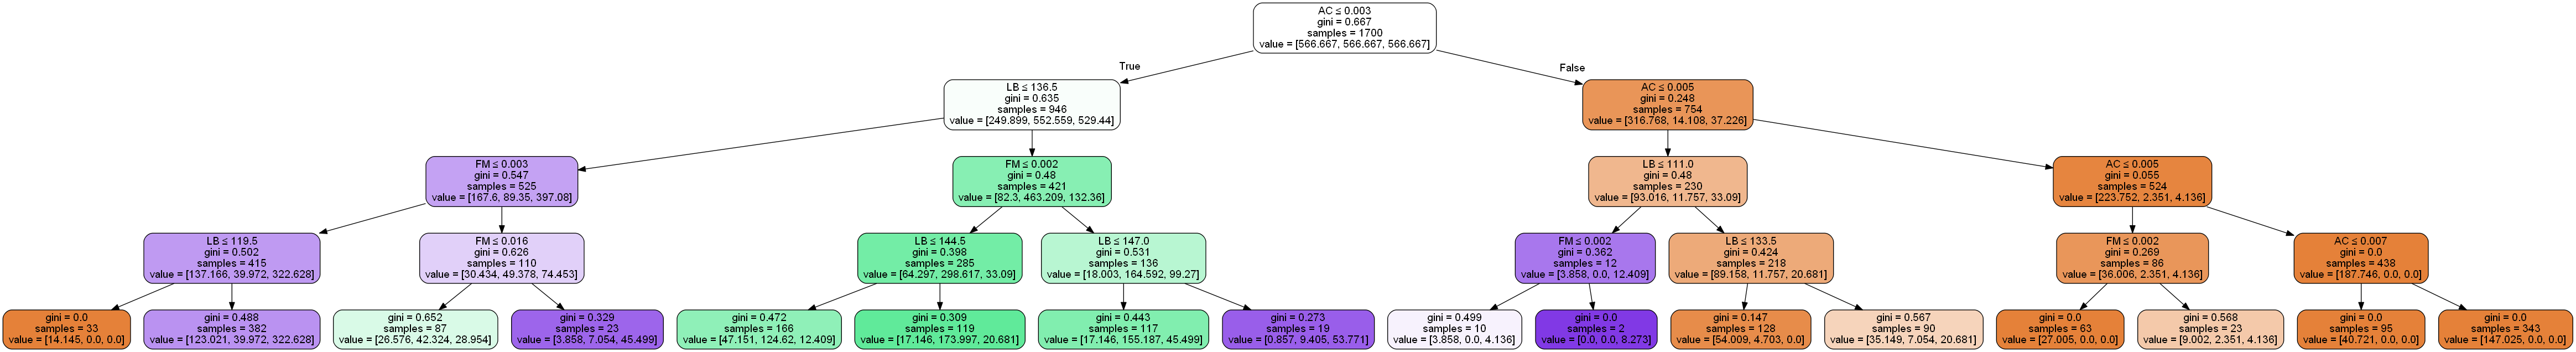

<Figure size 1008x1008 with 0 Axes>

In [20]:
dot_data = StringIO() ## creating a empty file
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(14,14))

export_graphviz(dt, out_file=dot_data,
filled=True, rounded=True,
special_characters=True , feature_names=ctg_train_x_names )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Code for GRID-SEARCH

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
dt=DecisionTreeClassifier()

In [23]:
search_dict={'criterion':('entropy','gini'),
             'max_depth':(4,5,6,7),
             'min_samples_split':(50,75,100)}

In [24]:
grid=GridSearchCV(dt,param_grid=search_dict)

In [25]:
grid.fit(df_train_x,df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (4, 5, 6, 7),
                         'min_samples_split': (50, 75, 100)})

In [26]:
grid.best_params_ #best params

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 50}

In [27]:
pred_grid=grid.predict(df_test_x)

In [28]:
confusion_matrix(pred_grid,df_test_y)

array([[315,  28,  31],
       [ 18,  23,   2],
       [  0,   3,   6]], dtype=int64)

In [29]:
df1=df

In [30]:
df1

,LB,AC,FM,NSP
0,120,0.000,0.000,2
1,132,0.006,0.000,1
2,133,0.003,0.000,1
3,134,0.003,0.000,1
4,132,0.007,0.000,1
...,...,...,...,...
2121,140,0.000,0.000,2
2122,140,0.001,0.000,2
2123,140,0.001,0.000,2
2124,140,0.001,0.000,2


# oversampling manually

In [31]:
df1_train,df1_test= train_test_split(df1,test_size=.2,random_state=100)

In [32]:
df1_train.shape

(1700, 4)

In [33]:
df1_train.NSP.value_counts()

1    1322
2     241
3     137
Name: NSP, dtype: int64

In [34]:
p3=df1_train[df1_train.NSP==3]

In [35]:
#p2=df1_train[df1_train.NSP==2]

In [36]:
df1_train1 = pd.concat([df1_train,p3,p3,p3,p3,p3,p3])

In [37]:
#df1_train1 = pd.concat([df1_train,p2,p2,p2,p2])

In [38]:
df1_train1.shape

(2522, 4)

In [39]:
df1_train1.NSP.value_counts()

1    1322
3     959
2     241
Name: NSP, dtype: int64

In [40]:
df1_train1_x=df1_train1.iloc[:,0:-1]
df1_train1_y=df1_train1.iloc[:,-1]

In [41]:
df1_test_x=df1_test.iloc[:,0:-1]
df1_test_y=df1_test.iloc[:,-1]

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt1=DecisionTreeClassifier(criterion='gini')

In [44]:
dt1.fit(df1_train1_x,df1_train1_y)

DecisionTreeClassifier()

In [45]:
pred_dt1=dt1.predict(df1_test_x)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
confusion_matrix(pred_dt1,df1_test_y)

array([[283,  18,   1],
       [ 18,  21,   5],
       [ 32,  15,  33]], dtype=int64)

In [48]:
accuracy_score(df1_test_y,pred_dt1)

0.7910798122065728

In [49]:
33/39

0.8461538461538461

In [50]:
#feature_imp=pd.DataFrame({'importance':dt.feature_importances_,'columns':df_train_x.columns})
#feature_imp.sort_values('importance',ascending=False)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## code for GRID in oversampled data

In [51]:
dt1=DecisionTreeClassifier()

In [52]:
search_dict1={'criterion':('entropy','gini'),
             'max_depth':(4,5,6,7),
             'min_samples_split':(50,75,100)}

In [53]:
grid1=GridSearchCV(dt1,param_grid=search_dict1)

In [54]:
grid1.fit(df1_train1_x,df1_train1_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (4, 5, 6, 7),
                         'min_samples_split': (50, 75, 100)})

In [55]:
grid1.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}

In [56]:
pred_grid1=grid1.predict(df1_test_x)

In [57]:
confusion_matrix(pred_grid1,df1_test_y)

array([[249,  15,   0],
       [ 18,  14,   5],
       [ 66,  25,  34]], dtype=int64)

# RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc=RandomForestClassifier(n_estimators=200)

In [60]:
rfc.fit(df1_train1_x,df1_train1_y)

RandomForestClassifier(n_estimators=200)

In [61]:
pred_rfc1=rfc.predict(df1_test_x)

In [62]:
confusion_matrix(pred_rfc1,df1_test_y)

array([[280,  14,   0],
       [ 21,  23,   3],
       [ 32,  17,  36]], dtype=int64)

# how to decide which model should i use ??
### Answer its difficult to say which model will give me best result...i will create model using all possible algo and then decide based on confusion matrix( model performance ) which algo to be used

In [63]:
rfc=RandomForestClassifier()

In [73]:
search_for_rfc={'criterion':('entropy','gini'),
             'n_estimators':(100,150,200),
             'max_depth':(4,5,6,7)}

In [74]:
grid_for_rfc=GridSearchCV(rfc,param_grid=search_for_rfc)

In [75]:
grid_for_rfc.fit(df1_train1_x,df1_train1_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (4, 5, 6, 7),
                         'n_estimators': (100, 150, 200)})

In [67]:
grid_for_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}

In [68]:
pred_grid_for_rfc=grid_for_rfc.predict(df1_test_x)

In [69]:
confusion_matrix(pred_grid_for_rfc,df1_test_y)

array([[249,  15,   0],
       [ 18,  14,   4],
       [ 66,  25,  35]], dtype=int64)

In [70]:
accuracy_score(df1_test_y,pred_grid_for_rfc)

0.6995305164319249